In [1]:
import pandas
import plotly.express as px
import matplotlib.pyplot as plt

import numpy

In [3]:
prices = pandas.read_csv('../Data/data.csv')
try:
    prices = prices.drop(['Unnamed: 0'], axis=1)
except:
    pass
prices

,Symbol,base,quote,Kline open time,Open price,High price,Low price,Close price,Volume,Kline Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,"Unused field, ignore"
0,ETHBTC,ETH,BTC,1669395600000,0.072026,0.072222,0.072026,0.072222,1342.1624,1669397399999,96.776126,2657,794.6663,57.298344,0
1,ETHBTC,ETH,BTC,1669397400000,0.072222,0.072335,0.072117,0.072162,1185.9640,1669399199999,85.640393,2727,560.9044,40.508977,0
2,ETHBTC,ETH,BTC,1669399200000,0.072163,0.072263,0.072101,0.072189,813.4793,1669400999999,58.717779,1862,359.8931,25.975732,0
3,ETHBTC,ETH,BTC,1669401000000,0.072188,0.072261,0.072161,0.072212,936.2168,1669402799999,67.599402,1816,470.6928,33.988586,0
4,ETHBTC,ETH,BTC,1669402800000,0.072223,0.072479,0.072197,0.072375,1115.5725,1669404599999,80.727099,3088,593.4310,42.945939,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229157,BUSDRON,BUSD,RON,1670943600000,4.629000,4.630000,4.620000,4.621000,5984.0000,1670945399999,27672.337000,108,2086.0000,9651.160000,0
1229158,BUSDRON,BUSD,RON,1670945400000,4.620000,4.631000,4.620000,4.630000,3618.0000,1670947199999,16734.982000,42,1642.0000,7593.482000,0
1229159,BUSDRON,BUSD,RON,1670947200000,4.631000,4.631000,4.630000,4.631000,3254.0000,1670948999999,15069.018000,33,2998.0000,13883.738000,0
1229160,BUSDRON,BUSD,RON,1670949000000,4.630000,4.631000,4.630000,4.631000,14415.0000,1670950799999,66749.027000,92,7577.0000,35089.087000,0


----
### Which coin is available for the most trading

In [7]:
g_symbol_data = prices.groupby(["Symbol","base","quote"]).count()[["Kline open time"]]
g_symbol_data.reset_index(inplace=True)
quote_symbol_data = g_symbol_data.groupby("quote").count()[["Kline open time"]]
base_symbol_data = g_symbol_data.groupby("base").count()[["Kline open time"]]

In [8]:
merge_data = base_symbol_data.merge(quote_symbol_data, left_index=True, right_index=True, how='outer').fillna(0).astype(int)
merge_data["Total"] = merge_data["Kline open time_x"] + merge_data["Kline open time_y"]
merge_data = merge_data.sort_values(by="Total", ascending=False).head(20)
merge_data

,Kline open time_x,Kline open time_y,Total
USDT,8,334,342
BUSD,11,321,332
BTC,13,286,299
BNB,13,120,133
ETH,14,112,126
TRY,0,77,77
EUR,2,46,48
BRL,0,31,31
GBP,2,20,22
AUD,2,18,20


In [6]:
fig = px.bar(merge_data, x=merge_data.index, y='Total')
fig.show()

> Kết quả cũng không quá bất ngờ khi đứng top là các đồng tiền ổn định giá là UDST, BUSD, BNB được dùng cho đa số giao dịch có thể thực hiện. tiếp đến là các đồng tiền nổi trội trong giới coin là BTC cũng như ETH cũng chiếm một số lượng đáng kể
----

### Bây giờ ta kiểm tra xem có sự chênh lệch giữa giá trao đổi và giá trị thực không

> Việc giá trị thực không có trong bảng này nên ta sẽ dựa vào các đồng tiền ổn định để kiểm tra giá

In [37]:
stable_coin  = ['USDT','BUSD']
only_stable = prices[prices.base.isin(stable_coin) | prices.quote.isin(stable_coin)][['base','quote','Kline open time','Open price','High price','Low price','Close price']].set_index('Kline open time')

In [42]:
temp = only_stable[~only_stable.quote.isin(stable_coin)]
only_stable[~only_stable.quote.isin(stable_coin)] = pandas.concat(
    [temp[['quote','base']],1/temp[['Open price','High price','Low price','Close price']]],
    axis=1
)

In [41]:
only_stable

,base,quote,Open price,High price,Low price,Close price
Kline open time,,,,,,
1669395600000,BTC,USDT,16485.140000,16512.430000,16474.290000,16483.270000
1669397400000,BTC,USDT,16483.270000,16536.350000,16482.980000,16510.380000
1669399200000,BTC,USDT,16509.520000,16528.600000,16502.770000,16509.400000
1669401000000,BTC,USDT,16508.950000,16518.590000,16477.130000,16495.430000
1669402800000,BTC,USDT,16495.430000,16553.880000,16494.010000,16515.200000
...,...,...,...,...,...,...
1670943600000,RON,BUSD,0.216029,0.215983,0.216450,0.216403
1670945400000,RON,BUSD,0.216450,0.215936,0.216450,0.215983
1670947200000,RON,BUSD,0.215936,0.215936,0.215983,0.215936


> ta coi bảng trên là giá trị thực của đồng (tuy trao đổi qua stable coin nhưng nó gần như giữ ở mức 1$), giờ ta sẽ kiểm tra giá

In [86]:
symbols_unique = numpy.unique(prices[['Symbol','base','quote']].to_numpy(dtype='str'),axis=0)
price_table = prices.set_index(['Symbol','Kline open time'])

In [100]:
n = len(symbols_unique)
print('total: ',n)
diff = []
for i in symbols_unique:
    if n%100 == 0:
        print(n)
    cal = only_stable[only_stable.base == i[1]][['Open price','High price','Low price','Close price']]/only_stable[only_stable.base == i[2]][['Open price','High price','Low price','Close price']]
    gap = price_table.loc[i[0]][['Open price','High price','Low price','Close price']]/cal
    diff += [ numpy.mean(gap,axis=0)]
    n-=1
diff = pandas.DataFrame(diff)

total:  1426
1400
1300
1200
1100
1000
900
800
700
600
500
400
300
200
100


In [112]:
pandas.DataFrame(diff).describe()

,Open price,High price,Low price,Close price
count,1078.000000,1078.000000,1078.000000,1078.000000
mean,1.000101,1.000537,0.999862,1.000056
std,0.000469,0.001527,0.001228,0.000561
min,0.994130,0.992628,0.991015,0.992246
25%,0.999977,0.999870,0.999268,0.999935
50%,1.000043,1.000229,1.000012,1.000003
75%,1.000148,1.001143,1.000263,1.000089
max,1.005238,1.017435,1.006667,1.007816


> Dựa vào bảng trên, ta thấy phân bố chủ yếu ở mức 1., và độ lệch phân bố cũng ko cao, nên có thể xem là giá trị quy đổi các token có tuân theo giá trị thực của chúng


#### giờ ta xem xét chu kì tăng giảm của các token này

In [139]:
symbols_price = prices.set_index(['Symbol','Kline open time'])[['High price','Low price']]

In [204]:
period = []
n = len(symbols_unique)
print('total: ',n)
for i in symbols_unique[:,0]:
    if n%100 == 0:
        print(n)
    n-=1
    try:
        temp = (symbols_price.loc[i].iloc[1:].reset_index() - symbols_price.loc[i].iloc[:-1].reset_index())
        a = [0] 
        b = [0]
        c = [0]
        d = [0]
        for i in  (temp['High price'] >=0):
            if i:
                a[-1] +=1
            else:
                a.append(1)
        for i in  (temp['High price'] <=0):
            if i:
                b[-1] +=1
            else:
                b.append(1)

        for i in  (temp['Low price'] >=0):
            if i:
                c[-1] +=1
            else:
                c.append(1)
        for i in  (temp['Low price'] <=0):
            if i:
                d[-1] +=1
            else:
                d.append(1)
        period.append([numpy.mean(a),numpy.mean(b),numpy.mean(c),numpy.mean(d)])
    except:
        continue
period = pandas.DataFrame(period,columns=['High up','High down','Low up','Low down'])

total:  1426
1400
1300
1200
1100
1000
900
800
700
600
500
400
300
200
100


In [223]:
period.describe()

,High up,High down,Low up,Low down
count,1426.000000,1426.000000,1426.000000,1426.000000
mean,2.535641,2.923481,2.855344,2.585747
std,1.977907,2.214954,1.782369,1.931871
min,1.500000,1.963636,1.833333,1.766871
25%,2.004640,2.316354,2.291777,2.023419
50%,2.160000,2.518950,2.482759,2.226804
75%,2.579104,2.966530,2.956379,2.658462
max,45.473684,45.473684,43.200000,43.200000


<AxesSubplot:ylabel='Density'>

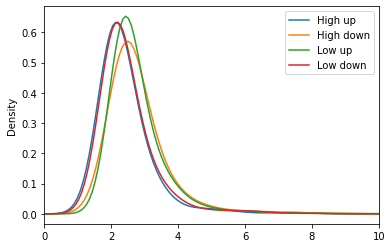

In [226]:
period.plot.kde(xlim = [0,10])

> thời gian trung bình cho mỗi lần tăng hoặc giảm nằm ở khoảng 2-3 chu kỳ, tuy đó thì chỉ số này sẽ không được chính xác lắm khi có độ lệch chuẩn khá là cao